In [70]:
%matplotlib inline
from keras.datasets import mnist 
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [45]:
import keras
import tensorflow
print(keras.__version__)
print(tensorflow.__version__)

2.2.0
1.8.0


In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
print(train_images.shape) #60k samples each image 28*28 pixels
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [17]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

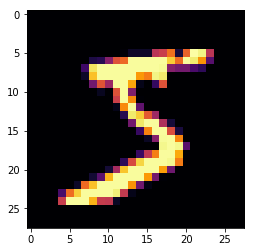

In [23]:
plt.imshow(train_images[0], cmap="inferno")

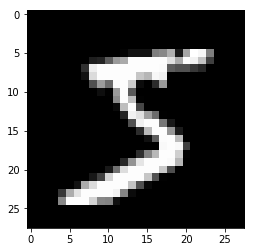

In [25]:
plt.imshow(train_images[0], cmap="gray")

In [29]:
print(train_labels[0])

5


Sequential model
- Add layers
- Compile the model

In [50]:
model = models.Sequential()
model.add(layers.Dense(
    512, # random guess. less than 784 (28*28), greater than output dimension(10)
    activation="relu", # rectified linier unit. relu(x) = max(0,x) 
    input_shape=(28 * 28,)
))
# model.add(layers.Dense(10, activation="relu"))
# model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(10, activation="softmax")) # has to be this with option with categorical cross entropy

model.compile(
    optimizer="rmsprop", # gradient decent optimizer, finds learning rate 
    loss="categorical_crossentropy", # 
    metrics=["accuracy"] #
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [101]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype("float32") / 255
print(train_images.shape)
print(train_images[0])


(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [102]:
print(test_images.shape)
print(test_images[0])

test_images = test_images.reshape((10000, 28*28)) 
test_images = test_images.astype("float32") / 255 # convert to float ad normalize

print(test_images.shape)
print(test_images[0])


(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 24

In [103]:
train_labels = to_categorical(train_labels)
print(train_labels[0])

test_labels = to_categorical(test_labels)
print(test_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [110]:
model.fit(
        train_images, train_labels, 
        epochs=7,
        batch_size=128
)

Epoch 1/7
60000/60000 [==============================] - 2s 33us/step - loss: 0.0014 - acc: 0.9996
Epoch 2/7
60000/60000 [==============================] - 2s 33us/step - loss: 0.0011 - acc: 0.9998
Epoch 3/7
60000/60000 [==============================] - 2s 33us/step - loss: 8.1881e-04 - acc: 0.9999
Epoch 4/7
60000/60000 [==============================] - 2s 33us/step - loss: 8.5244e-04 - acc: 0.9998
Epoch 5/7
60000/60000 [==============================] - 2s 33us/step - loss: 7.0123e-04 - acc: 0.9999
Epoch 6/7
60000/60000 [==============================] - 2s 33us/step - loss: 6.3839e-04 - acc: 0.9999
Epoch 7/7
60000/60000 [==============================] - 2s 33us/step - loss: 5.6518e-04 - acc: 0.9999


In [113]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/step


In [114]:
print(test_loss, test_acc)

0.11626903867062566 0.982
